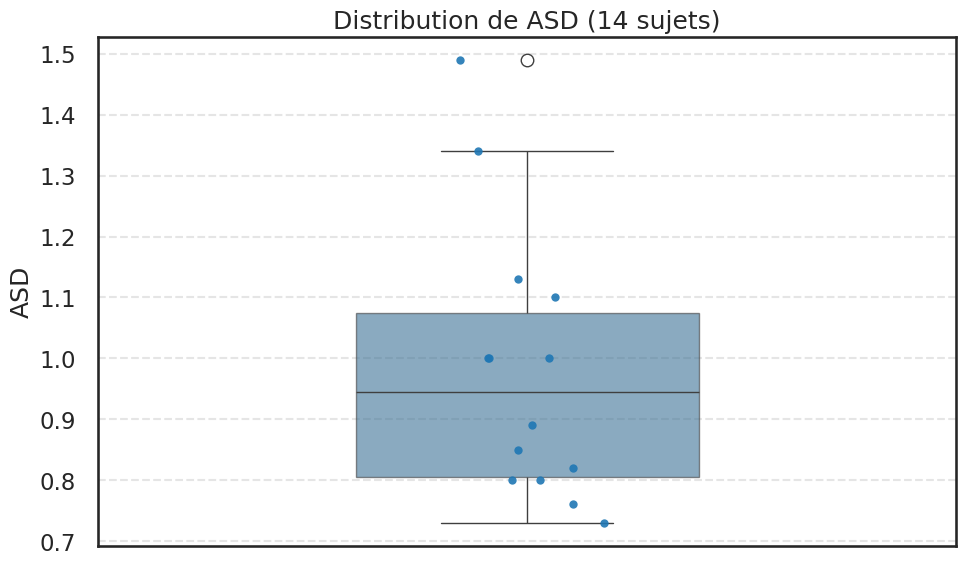

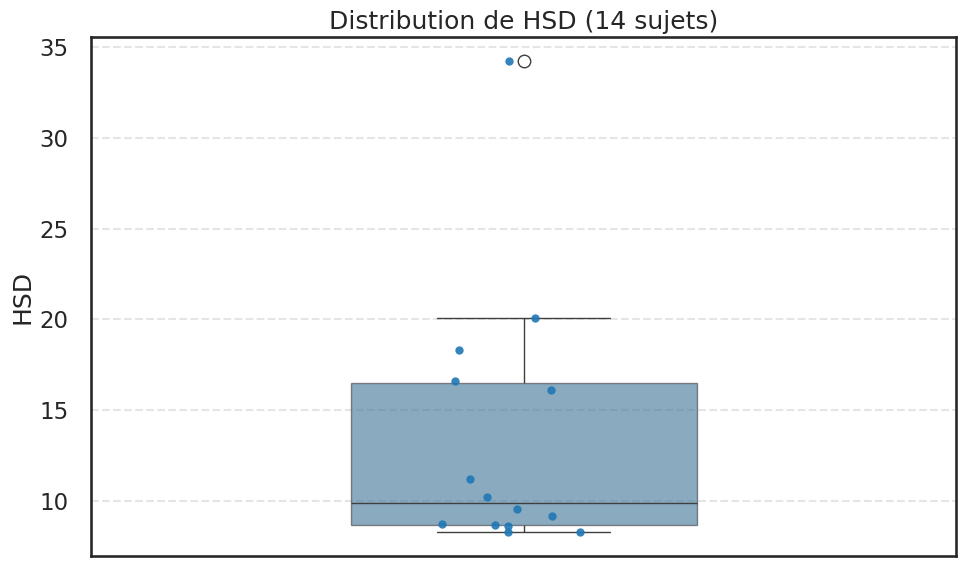

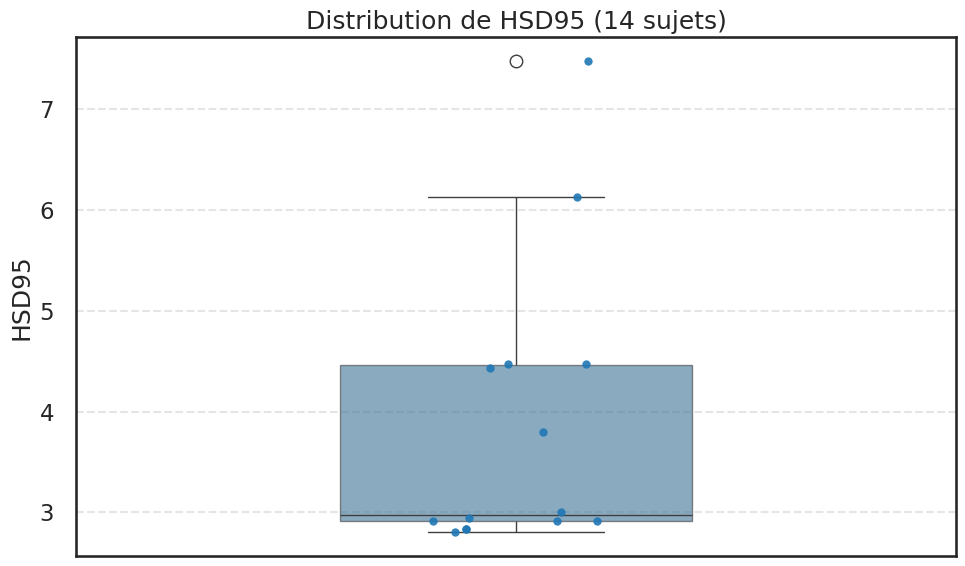

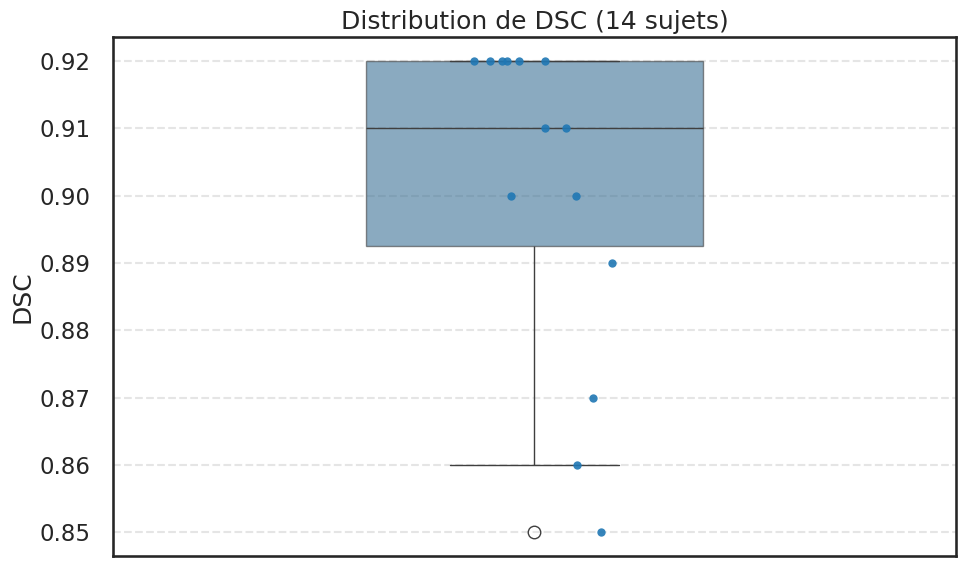

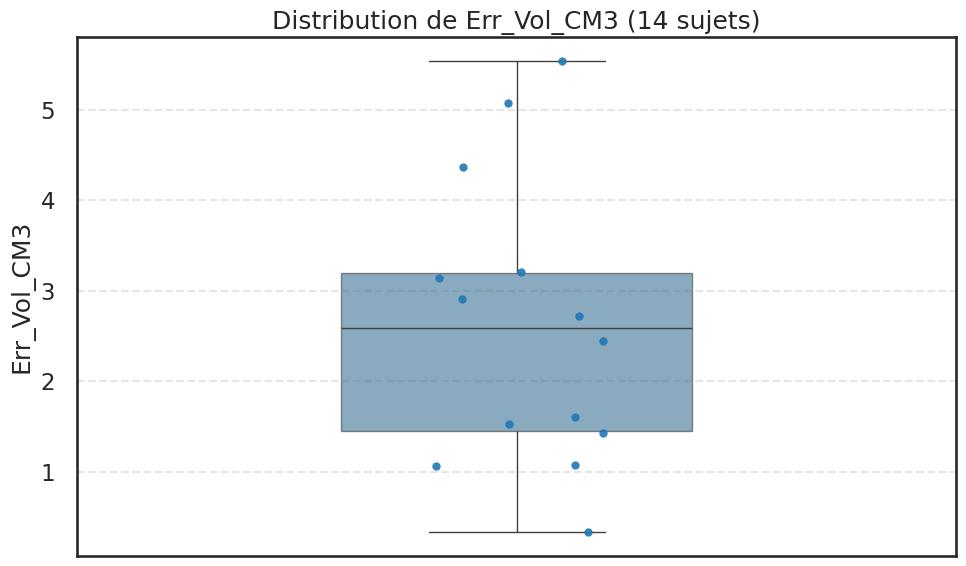

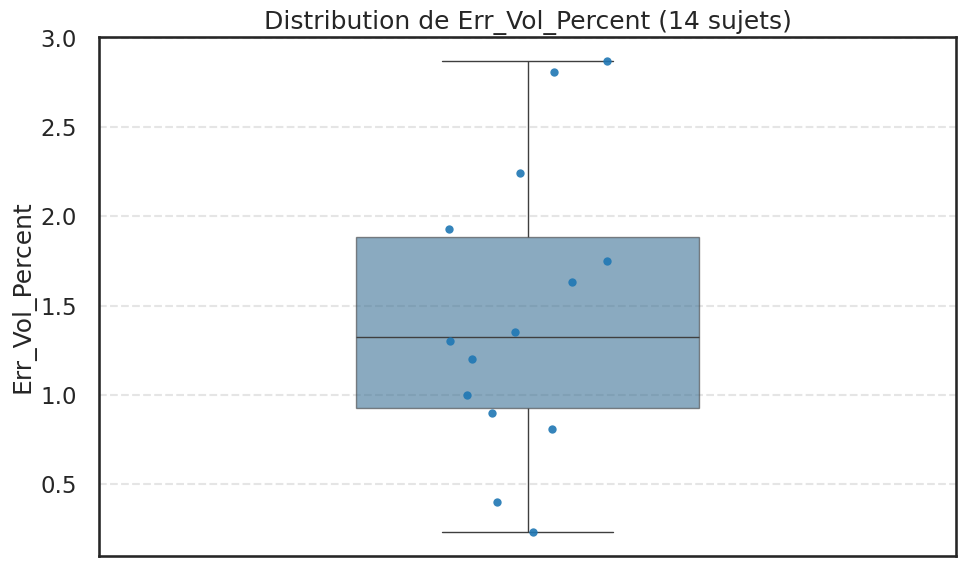

In [4]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns


########################################################
# -------- PARSE FUNCTION (yours) ----------------------
########################################################

def parse_log_file(path):
    parsed_data = []
    if not os.path.isfile(path):
        return pd.DataFrame()
    with open(path, 'r') as file:
        lines = file.readlines()
    batch_cases, z_latents_batch_str, stats = [], "", {}
    stats_pattern = r"ASD: ([\d.]+), HSD: ([\d.]+), HSD95: ([\d.]+), DSC: ([\d.]+), err_vol_cm_3: ([\d.]+), err_vol_percent: ([\d.]+)"
    i = 0
    while i < len(lines):
        line = lines[i]
        if "Batch cases: " in line:
            batch_cases = line.strip().replace("Batch cases: ", "").split(', ')
        elif batch_cases and "z:" in line:
            tensor_lines = [line.strip().split('z:')[1].strip()]
            i += 1
            while i < len(lines) and ("tensor" in lines[i] or "  " in lines[i]):
                tensor_lines.append(lines[i].strip())
                i += 1
            z_latents_batch_str = ' '.join(tensor_lines)
            continue
        elif batch_cases and "Batch ASD:" in line:
            match = re.search(stats_pattern, line)
            stats = {k: float(v) for k, v in zip(
                ['ASD','HSD','HSD95','DSC','Err_Vol_CM3','Err_Vol_Percent'], match.groups()
            )} if match else {k: None for k in ['ASD','HSD','HSD95','DSC','Err_Vol_CM3','Err_Vol_Percent']}
        if batch_cases and stats:
            for case in batch_cases:
                parsed_data.append((case.strip().lower(), z_latents_batch_str, *stats.values()))
            batch_cases, z_latents_batch_str, stats = [], "", {}
        i += 1
    columns = ['Subject','z_latents_batch','ASD','HSD','HSD95','DSC','Err_Vol_CM3','Err_Vol_Percent']
    return pd.DataFrame(parsed_data, columns=columns)



########################################################
# -------- READ LOG ------------------------------------
########################################################

log_path = "./DIASEM_GM_set1_500_eval_ax2_x1/log.txt"

df = parse_log_file(log_path)


########################################################
# -------- BOX PLOTS (style demandé) -------------------
########################################################

metrics = ['ASD', 'HSD', 'HSD95', 'DSC', 'Err_Vol_CM3', 'Err_Vol_Percent']

output_dir = "figures_boxplots"
os.makedirs(output_dir, exist_ok=True)

plt.style.use("seaborn-v0_8")
sns.set_style("white")
sns.set_context("talk")
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"

metrics = ['ASD', 'HSD', 'HSD95', 'DSC', 'Err_Vol_CM3', 'Err_Vol_Percent']

for metric in metrics:

    plt.figure(figsize=(10, 6))

    color = "#1f77b4"

    # Boxplot avec transparence
    box = sns.boxplot(
        data=df,
        y=metric,
        width=0.4,
        saturation=0.6,
        color=color
    )
    
    # Ajouter transparence
    for patch in box.patches:
        patch.set_alpha(0.6)

    # Points individuels
    sns.stripplot(
        data=df,
        y=metric,
        jitter=True,
        alpha=0.9,
        size=6,
        color=color
    )

    plt.title(f"Distribution de {metric} (14 sujets)")
    plt.ylabel(metric)
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [22]:
df

,Subject,z_latents_batch,ASD,HSD,HSD95,DSC,Err_Vol_CM3,Err_Vol_Percent
0,['s01_marcha_gm_seg'],"Parameter containing: tensor([[-0.8769, 0.298...",1.13,34.23,7.48,0.91,1.06,0.40
1,['s02_titmor_gm_seg'],"Parameter containing: tensor([[-9.2497e-01, 6...",0.73,16.61,2.83,0.92,2.45,1.30
2,['s03_rapham_gm_seg'],"Parameter containing: tensor([[ 0.5024, 0.787...",1.00,18.33,4.47,0.91,4.37,1.93
3,['s04_hugmar_gm_seg'],"Parameter containing: tensor([[ 0.5782, 1.289...",1.00,20.10,4.47,0.90,5.54,2.81
4,['s21_trital_gm_seg'],"Parameter containing: tensor([[-0.2750, 0.287...",0.89,8.72,2.83,0.92,5.07,1.35
5,['sujet1_gm_fort_seg'],"Parameter containing: tensor([[-0.7362, 0.237...",0.80,10.23,2.91,0.92,1.08,0.81
6,['sujet1_gm_faible_seg'],"Parameter containing: tensor([[-0.6165, 0.295...",0.80,8.32,2.91,0.92,0.33,0.23
7,['sujet1_gm_pad_seg'],"Parameter containing: tensor([[-0.6797, 0.400...",1.00,9.55,2.91,0.90,1.43,1.00
8,['sujet2_gm_faible_seg'],"Parameter containing: tensor([[-0.4395, 0.243...",1.49,11.20,4.43,0.86,3.21,1.75
9,['sujet2_gm_fort_seg'],"Parameter containing: tensor([[-0.4560, 0.337...",0.76,8.28,2.80,0.92,1.60,0.90
